In [1]:
import requests

from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
import matplotlib as mpl
import numpy as np
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
url = "http://www.naturalstattrick.com/playerteams.php?fromseason=20212022&thruseason=20212022&stype=2&sit=5v5&score=all&stdoi=oi&rate=n&team=ALL&pos=S&loc=B&toi=0&gpfilt=none&fd=&td=&tgp=410&lines=single&draftteam=ALL"
req = requests.get(url)

In [3]:
#200 is success
req.status_code

200

In [4]:
soup = BeautifulSoup(req.content)

In [5]:
top = list(soup.children)
len(top)

1

In [6]:
body = list(top[0].children)[1]

In [7]:
body.find_all('th')[0:1000]

[<th></th>,
 <th class="lh">Player</th>,
 <th>Team</th>,
 <th>Position</th>,
 <th>GP</th>,
 <th class="time">TOI</th>,
 <th class="cf">CF</th>,
 <th class="cf">CA</th>,
 <th class="cf">CF%</th>,
 <th class="ff">FF</th>,
 <th class="ff">FA</th>,
 <th class="ff">FF%</th>,
 <th class="sf">SF</th>,
 <th class="sf">SA</th>,
 <th class="sf">SF%</th>,
 <th class="gf">GF</th>,
 <th class="gf">GA</th>,
 <th class="gf">GF%</th>,
 <th class="xgf">xGF</th>,
 <th class="xgf">xGA</th>,
 <th class="xgf">xGF%</th>,
 <th class="sc">SCF</th>,
 <th class="sc">SCA</th>,
 <th class="sc">SCF%</th>,
 <th class="hd">HDCF</th>,
 <th class="hd">HDCA</th>,
 <th class="hd">HDCF%</th>,
 <th class="hds">HDGF</th>,
 <th class="hds">HDGA</th>,
 <th class="hds">HDGF%</th>,
 <th class="md">MDCF</th>,
 <th class="md">MDCA</th>,
 <th class="md">MDCF%</th>,
 <th class="mds">MDGF</th>,
 <th class="mds">MDGA</th>,
 <th class="mds">MDGF%</th>,
 <th class="ld">LDCF</th>,
 <th class="ld">LDCA</th>,
 <th class="ld">LDCF%</th>,


In [8]:
columns = [item.text for item in body.find_all('th')]
columns[0:5]
body.find_all('td')[0:1000]

[<td>1</td>,
 <td class="lh"><a href="playerreport.php?fromseason=20212022&amp;thruseason=20212022&amp;playerid=8465009&amp;sit=5v5&amp;stype=2">Zdeno Chara</a></td>,
 <td>NYI</td>,
 <td>D</td>,
 <td>72</td>,
 <td>1187.8</td>,
 <td>959</td>,
 <td>1252</td>,
 <td>43.37</td>,
 <td>735</td>,
 <td>925</td>,
 <td>44.28</td>,
 <td>539</td>,
 <td>671</td>,
 <td>44.55</td>,
 <td>49</td>,
 <td>43</td>,
 <td>53.26</td>,
 <td>45.96</td>,
 <td>54.74</td>,
 <td>45.64</td>,
 <td>501</td>,
 <td>638</td>,
 <td>43.99</td>,
 <td>208</td>,
 <td>252</td>,
 <td>45.22</td>,
 <td>29</td>,
 <td>25</td>,
 <td>53.70</td>,
 <td>293</td>,
 <td>386</td>,
 <td>43.15</td>,
 <td>12</td>,
 <td>12</td>,
 <td>50.00</td>,
 <td>400</td>,
 <td>546</td>,
 <td>42.28</td>,
 <td>8</td>,
 <td>6</td>,
 <td>57.14</td>,
 <td>9.09</td>,
 <td>93.59</td>,
 <td>1.027</td>,
 <td>106</td>,
 <td>252</td>,
 <td>119</td>,
 <td>998</td>,
 <td>47.11</td>,
 <td>292</td>,
 <td>356</td>,
 <td>300</td>,
 <td>49.32</td>,
 <td>2</td>,
 <td class="

In [9]:
data = [e.text for e in body.find_all('td')]

In [10]:
data[0:1000]
start = 0
table= []
#loop through entire data
while start+len(columns) <= len(data):
    player = []
    #use length of columns as iteration stop point to get list of info for 1 player 
    for i in range(start,start+len(columns)):
        player.append(data[i])
    #add player row to list
    table.append(player)
    #start at next player
    start += len(columns)
table[0:980]
df = pd.DataFrame(table, columns = columns, dtype = 'float').set_index('')

Player Name: Auston Matthews


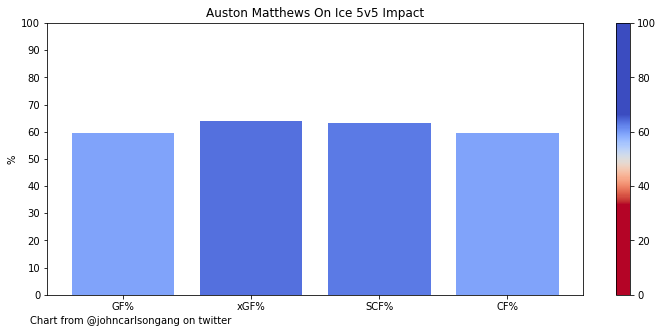

In [11]:
Userinput = input('Player Name: ')
df = df.replace(to_replace ="-",
                 value =0)

Player = df[df['Player'] == Userinput].index
playerdf = df.iloc[Player-1]
Playername = playerdf.iloc[-1]['Player']


#TOI

TOItotal = playerdf['TOI']
GP = playerdf.iloc[-1]['GP']
TOIgame = TOItotal/GP


#GF%

Gpercent =  playerdf.iloc[-1]['GF%']


#XGF%

xGpercent =  playerdf.iloc[-1]['xGF%']


#SCF% 

SCFpercent =  playerdf.iloc[-1]['SCF%']


#CF%

CFpercent =  playerdf.iloc[-1]['CF%']


Analytics = ['GF%','xGF%','SCF%','CF%']
AnalyticsValues = [Gpercent,xGpercent,SCFpercent,CFpercent]
AnalyticsValues = [float(val) for val in AnalyticsValues]
data_height_normalized = [x / 100 for x in AnalyticsValues]

viridisBig = cm.get_cmap('coolwarm_r')
newcmp = ListedColormap(viridisBig(np.linspace(-1,2,256)))
fig, ax = plt.subplots(figsize=(12, 5))
#my_cmap = plt.cm.get_cmap('RdBu')
my_cmap = plt.cm.get_cmap(newcmp)
colors = my_cmap(data_height_normalized)

rects = ax.bar(Analytics, AnalyticsValues, color=colors)

sm = ScalarMappable(cmap=my_cmap, norm=plt.Normalize(0,100))

plt.ylim(0, 100)
cbar = plt.colorbar(sm)

plt.yticks(np.arange(0, 100.8, 10))
plt.title(Playername + (" On Ice 5v5 Impact"))
plt.ylabel('%')
plt.xlabel('Chart from @johncarlsongang on twitter                                                                                                                      ')
fig.patch.set_facecolor('xkcd:white')
plt.show()

In [5]:
import sys
!{sys.executable} -m pip install --upgrade flask

Requirement already up-to-date: flask in c:\users\skram\anaconda3\lib\site-packages (2.1.3)


In [6]:
from flask import Flask

app = Flask(__name__)

@app.route("/")
def hello_world():
    return "<p>Hello, World!</p>"